In [148]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn.linear_model as sklm
import sklearn.model_selection as skms
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import numpy as np

In [149]:
main_df = pd.read_csv('data/df_main_merged.csv')

In [150]:
df = main_df.drop(['COUNTY', 'STATEABBREVIATION'], axis=1)

In [151]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [152]:
df.drop(['MSM12MTH', 'MSM5YEAR', '%msm12month'], axis=1, inplace=True)


In [153]:
df = df[df['HIVincidence'] > 0]

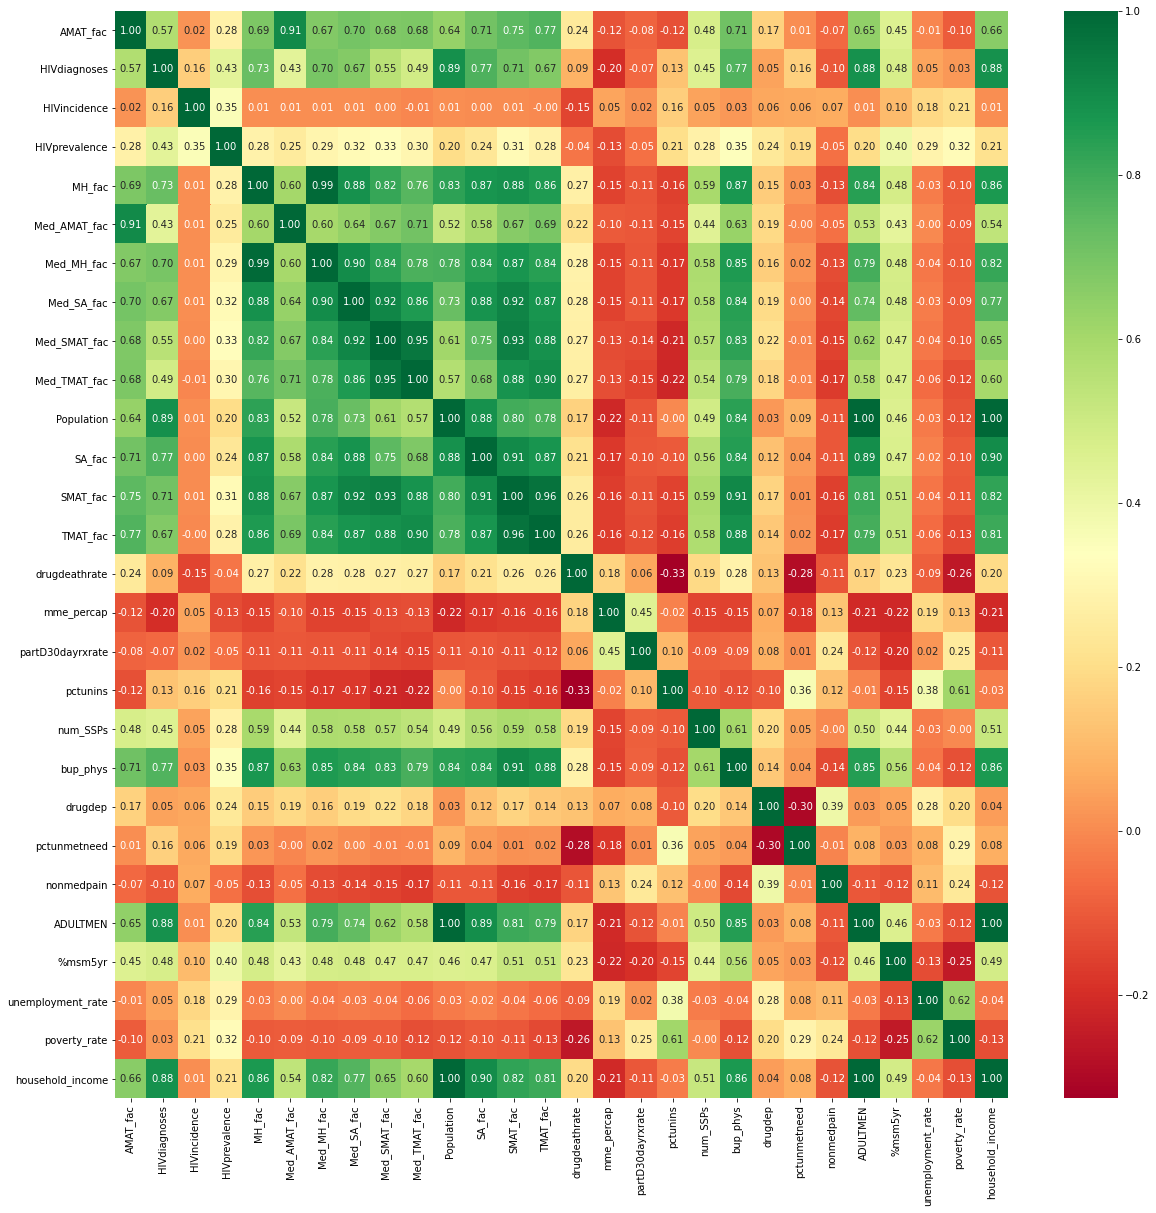

In [241]:
fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

In [155]:
df.drop(['PLHIV', 'drugdeathrate_est', 'drugdeaths', 'county_code', 'YEAR'], axis=1, inplace=True)

In [156]:
# scale data using standard scaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [220]:
X_true, X_holdout, y_true, y_holdout = skms.train_test_split(df.drop('HIVincidence', axis=1), df['HIVincidence'], test_size = .1)
X_train, X_test, y_train, y_test = skms.train_test_split(X_true, y_true)

In [221]:
alpha_list = np.linspace(0.00001, 1, num=500)

In [242]:
#alpha_list

In [223]:
mse_list = []
val_list = []
lasso_models = []

for val in alpha_list: 
    model = sklm.Lasso(alpha=val)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = np.mean((y_pred - y_test)**2)
    mse_list.append(mse)
    val_list.append(val)
    lasso_models.append(model)
    
mindex = 0

for idx, num in enumerate(mse_list):
    if num == min(mse_list):
        mindex = idx
        
optim_alpha = val_list[mindex]

optim_alpha

/Users/stellato/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264.7122512323024, tolerance: 0.06881139592481463
  positive)
/Users/stellato/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.526243326224403, tolerance: 0.06881139592481463
  positive)


0.0461017234468938

In [238]:
#mse_list

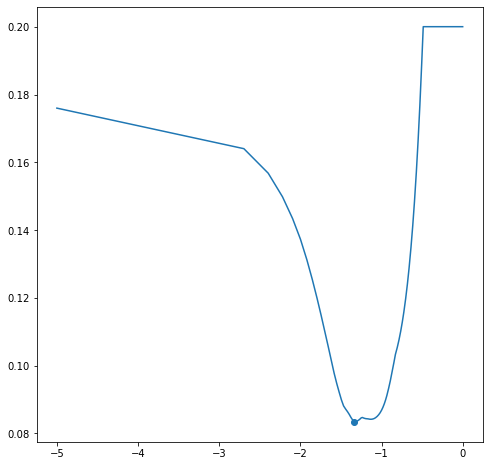

In [225]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(np.log10(np.array(val_list)), mse_list)
ax.scatter(np.log10(np.array(optim_alpha)), min(mse_list))

In [226]:
optim_model = sklm.Lasso(alpha=optim_alpha)

In [227]:
optim_model.fit(X_train, y_train)

Lasso(alpha=0.0461017234468938)

In [228]:
optim_model.coef_

array([-0.        ,  0.02738907,  0.31919241, -0.        , -0.        ,
       -0.        , -0.        , -0.02348655, -0.        , -0.        ,
       -0.        , -0.00224557, -0.        , -0.10811004,  0.12595024,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.01467394, -0.        ,  0.02085099,  0.01174142,
        0.01045106, -0.        ])

In [229]:
optim_model.intercept_

0.012710666527038289

In [230]:
coef_dict = dict()
for col, coef in zip(X_train.columns, list(optim_model.coef_)):
    coef_dict[col] = coef
    
coef_dict

{'AMAT_fac': -0.0,
 'HIVdiagnoses': 0.02738907346969826,
 'HIVprevalence': 0.31919241326087233,
 'MH_fac': -0.0,
 'Med_AMAT_fac': -0.0,
 'Med_MH_fac': -0.0,
 'Med_SA_fac': -0.0,
 'Med_SMAT_fac': -0.023486554214300837,
 'Med_TMAT_fac': -0.0,
 'Population': -0.0,
 'SA_fac': -0.0,
 'SMAT_fac': -0.0022455654379070172,
 'TMAT_fac': -0.0,
 'drugdeathrate': -0.10811004494167338,
 'mme_percap': 0.12595023774355138,
 'partD30dayrxrate': -0.0,
 'pctunins': 0.0,
 'num_SSPs': 0.0,
 'bup_phys': -0.0,
 'drugdep': -0.0,
 'pctunmetneed': -0.0,
 'nonmedpain': 0.014673936587390548,
 'ADULTMEN': -0.0,
 '%msm5yr': 0.020850986801218902,
 'unemployment_rate': 0.01174141820528134,
 'poverty_rate': 0.010451063396044232,
 'household_income': -0.0}

In [231]:
paths = pd.DataFrame(np.empty(shape=(len(val_list), len(X_train.columns))), index = val_list, columns=X_train.columns)

In [232]:
for idx, model in enumerate(lasso_models):
    paths.iloc[idx] = model.coef_
    
paths

,AMAT_fac,HIVdiagnoses,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,Population,...,num_SSPs,bup_phys,drugdep,pctunmetneed,nonmedpain,ADULTMEN,%msm5yr,unemployment_rate,poverty_rate,household_income
0.000010,-0.058172,0.417775,0.307273,0.226332,0.036272,-0.200382,0.073052,-0.117041,0.028936,-0.098983,...,0.070742,-0.055149,-0.125233,-0.130693,0.111371,-0.181539,0.104844,0.046148,0.064492,-0.065353
0.002014,-0.016942,0.368749,0.308730,0.000244,0.004187,0.000000,-0.000000,-0.040062,0.013468,-0.002818,...,0.070828,-0.047097,-0.115219,-0.125039,0.102565,-0.191348,0.101534,0.041707,0.061510,-0.089843
0.004018,-0.008161,0.341117,0.309573,-0.000000,0.000000,-0.000000,-0.000000,-0.016919,0.000000,-0.000000,...,0.065696,-0.042441,-0.107275,-0.119308,0.096219,-0.159880,0.099580,0.038504,0.055600,-0.098183
0.006022,-0.007103,0.320008,0.310230,-0.000000,-0.000000,-0.000000,-0.000000,-0.014796,-0.000000,-0.000000,...,0.060047,-0.038838,-0.098832,-0.113959,0.090750,-0.147442,0.096132,0.036112,0.049594,-0.092249
0.008026,-0.005867,0.298497,0.311139,-0.000000,-0.000000,-0.000000,-0.000000,-0.006416,-0.000000,-0.000000,...,0.054203,-0.035612,-0.090278,-0.108697,0.085109,-0.131731,0.093050,0.033480,0.043884,-0.086804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.991984,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.993988,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.995992,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.997996,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


/Users/stellato/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


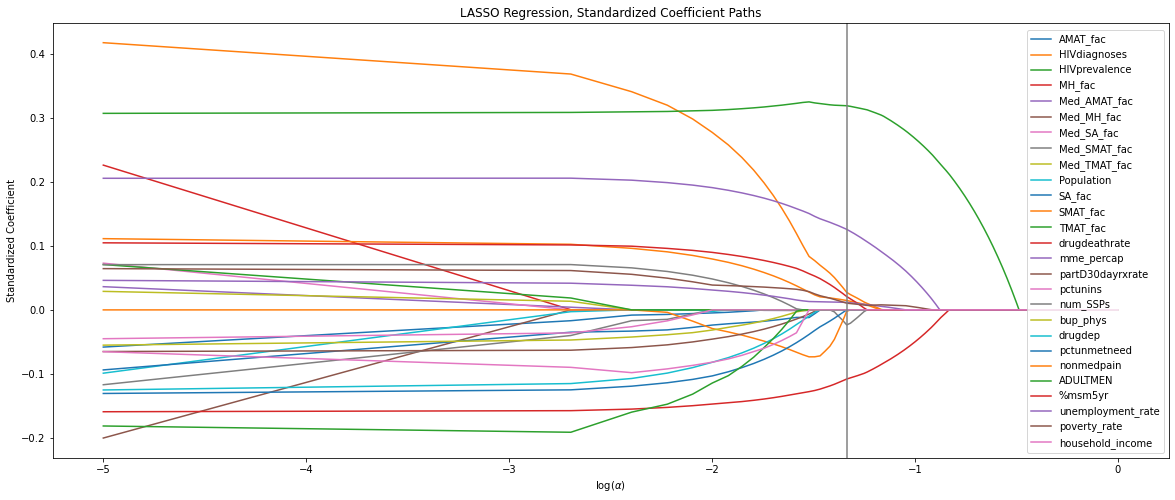

In [233]:
fig, ax = plt.subplots(figsize=(20, 8))
for column in X_train.columns:
    path = paths.loc[:, column]
    ax.plot(np.log10(val_list), path, label=column)
ax.axvline(np.log10(optim_alpha), color='grey')
ax.legend(loc='lower right')
ax.set_title("LASSO Regression, Standardized Coefficient Paths")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("Standardized Coefficient")

fig.show()

In [235]:
y_val_pred = optim_model.predict(X_holdout)

In [236]:
#mse against holdout data
np.mean((y_val_pred - y_holdout)**2)

0.16909947210529333